In [76]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df_2003 = pd.read_csv("fdi_paises_no_dirig_2003_w.csv", encoding="latin-1")
df_2007 = pd.read_csv("fdi_paises_no_dirig_2007_w.csv", encoding="latin-1")
df_2012 = pd.read_csv("fdi_paises_no_dirig_2012_w.csv", encoding="latin-1")

In [25]:
df_2003.loc[df_2003["Value"]>1, "relacion"] = 1
df_2003_nw = df_2003[df_2003["relacion"]==1]
g_2003=nx.from_pandas_edgelist(df_2003_nw, source="Partner country", target="Reporting country", edge_attr= ["Year", "Value"])
np.mean(list(nx.closeness_centrality(g_2003).values()))

0.46578670365954972

In [26]:
rango = [i for i in range(0, 120,3)]

clust_2003 = []
clust_2007 = []
clust_2012 = []

degree_centrality_2003 = []
degree_centrality_2007 = []
degree_centrality_2012 = []

betweenness_centrality_2003 = []
betweenness_centrality_2007 = []
betweenness_centrality_2012 = []

closeness_centrality_2003 = []
closeness_centrality_2007 = []
closeness_centrality_2012 = []


In [27]:
for i in rango:

    df_2003_nw = df_2003.loc[df_2003["Value"]>i]
    df_2007_nw = df_2007.loc[df_2007["Value"]>i]
    df_2012_nw = df_2012.loc[df_2012["Value"]>i]
    
    # Armo los grafos

    g_2003=nx.from_pandas_edgelist(df_2003_nw, source="Partner country", target="Reporting country", edge_attr= ["Year", "Value"])
    g_2007=nx.from_pandas_edgelist(df_2007_nw, source="Partner country", target="Reporting country", edge_attr= ["Year", "Value"])
    g_2012=nx.from_pandas_edgelist(df_2012_nw, source="Partner country", target="Reporting country", edge_attr= ["Year", "Value"])
    
    
    # Computo coef de clustering, grado medio, betweenness y centralidad de cercania 
    clust_2003_i = nx.average_clustering(g_2003)
    clust_2007_i = nx.average_clustering(g_2007)
    clust_2012_i = nx.average_clustering(g_2012)
    
    degree_centrality_2003_i = np.mean(list(nx.degree_centrality(g_2003).values())) 
    degree_centrality_2007_i = np.mean(list(nx.degree_centrality(g_2007).values())) 
    degree_centrality_2012_i = np.mean(list(nx.degree_centrality(g_2012).values())) 
    
    betweenness_centrality_2003_i = np.max(list(nx.betweenness_centrality(g_2003).values()))
    betweenness_centrality_2007_i = np.max(list(nx.betweenness_centrality(g_2007).values()))
    betweenness_centrality_2012_i = np.max(list(nx.betweenness_centrality(g_2012).values()))
    
    closeness_centrality_2003_i = np.mean(list(nx.closeness_centrality(g_2003).values()))
    closeness_centrality_2007_i = np.mean(list(nx.closeness_centrality(g_2007).values()))
    closeness_centrality_2012_i = np.mean(list(nx.closeness_centrality(g_2012).values()))
    
    clust_2003.append(clust_2003_i)
    clust_2007.append(clust_2007_i)
    clust_2012.append(clust_2012_i)
    
    degree_centrality_2003.append(degree_centrality_2003_i)
    degree_centrality_2007.append(degree_centrality_2007_i)
    degree_centrality_2012.append(degree_centrality_2012_i)

    betweenness_centrality_2003.append(betweenness_centrality_2003_i)
    betweenness_centrality_2007.append(betweenness_centrality_2007_i)
    betweenness_centrality_2012.append(betweenness_centrality_2012_i)

    closeness_centrality_2003.append(closeness_centrality_2003_i)
    closeness_centrality_2007.append(closeness_centrality_2007_i)
    closeness_centrality_2012.append(closeness_centrality_2012_i)    
    

In [122]:
resultados = pd.DataFrame({"delta" : rango, "coef_clust_2003" : clust_2003, "coef_clust_2007" : clust_2007, "coef_clust_2012" :clust_2012, "degree_2003" : degree_centrality_2003, "degree_2007" : degree_centrality_2007, "degree_2012" : degree_centrality_2012, "betweenness_2003" : betweenness_centrality_2003, "betweenness_2007" :betweenness_centrality_2007, "betweenness_2012" : betweenness_centrality_2012, "closeness_2003" : closeness_centrality_2003, "closeness_2007" :closeness_centrality_2007, "closeness_2012" :closeness_centrality_2012})
resultados.head()

,betweenness_2003,betweenness_2007,betweenness_2012,closeness_2003,closeness_2007,closeness_2012,coef_clust_2003,coef_clust_2007,coef_clust_2012,degree_2003,degree_2007,degree_2012,delta
0,0.236337,0.132871,0.236462,0.475378,0.488968,0.494615,0.726616,0.715972,0.644984,0.065783,0.087973,0.077041,0
1,0.268622,0.144246,0.146382,0.459857,0.476222,0.465302,0.601600,0.684073,0.592500,0.061453,0.082667,0.074742,3
2,0.220118,0.145099,0.143967,0.461737,0.476620,0.458567,0.596596,0.692713,0.574954,0.066789,0.084792,0.073652,6
3,0.221345,0.144129,0.149650,0.461102,0.475393,0.453140,0.586232,0.691924,0.551838,0.065629,0.085189,0.073253,9
4,0.230051,0.138450,0.165192,0.466353,0.479903,0.453377,0.605974,0.688633,0.519585,0.068725,0.090033,0.074540,12


In [147]:
resultados_long = pd.melt(resultados,
                       ["delta"],
                       var_name="metrica",
                       value_name="valor")

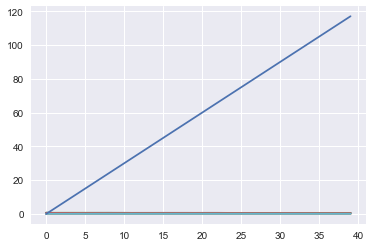

In [145]:
%matplotlib inline
plt.plot(resultados)
plt.show()


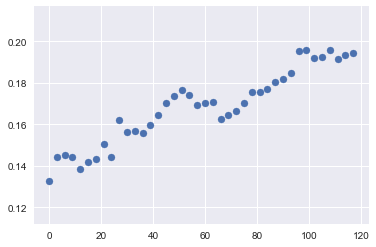

In [149]:
sns.set()
plt.scatter(y = resultados_long.loc[resultados_long["metrica"]=="betweenness_2007","valor"], x = resultados_long.loc[resultados_long["metrica"]=="betweenness_2007","delta"])
# plt.plot(y = resultados_long.loc[resultados_long["metrica"]=="betweenness_2012","valor"], x = resultados_long.loc[resultados_long["metrica"]=="betweenness_2012","delta"])
plt.show()

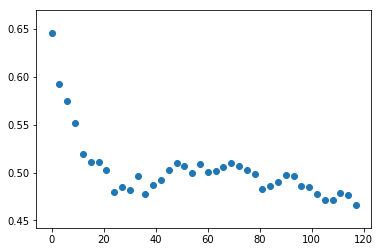

In [42]:
plot_1 = plt.scatter(y = clust_2012, x = rango)
plt.show(plot_1)